In [9]:
import pandas as pd
from collections import Counter
import itertools
import os

# Reading the symptoms dataset
sym_df=pd.read_csv('../data/2021VAERSData/2021VAERSSYMPTOMS.csv')
sym_df=sym_df.drop([ "SYMPTOMVERSION1","SYMPTOMVERSION2","SYMPTOMVERSION3","SYMPTOMVERSION4","SYMPTOMVERSION5"], axis=1)

sym_df.tail(3)



,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
618476,1553416,Pruritus,Vaccination site erythema,Vaccination site warmth,NaN,NaN
618477,1553436,Chest pain,Pericarditis,NaN,NaN,NaN
618478,1553448,COVID-19,NaN,NaN,NaN,NaN


In [11]:
# Reading the dataset
df=pd.read_csv("../data/2021VAERSData/2021VAERSDATA.csv", encoding='cp1252', low_memory=False)
df=df.drop([ "STATE","CAGE_YR", "CAGE_MO", "RPT_DATE" ,"DATEDIED", "DISABLE","LAB_DATA", "V_FUNDBY","V_ADMINBY","SPLTTYPE", "TODAYS_DATE","OFC_VISIT","BIRTH_DEFECT","ER_ED_VISIT" ], axis =1)
# df.tail()

In [12]:
# Random sample for symptom text
pd.set_option('max_colwidth', 200)
df["SYMPTOM_TEXT"].sample(5)

5175      Had itchy throat scratchy voice burning in chest  lightheaded and elevated BP 10 minutes after injection.  Next day pain and left arm and injection site blood pressure remains elevated and lighthe...
357747    Patient under age 18 was vaccinated with Moderna, which is a vaccine error, on 4/2/2021. He turned 18 prior to second vaccine. Troubleshooting: Scribe and vaccinator did not validate age;  screene...
355869    The patient started coughing and got nauseated in a few minutes after receiving the vaccine. She experienced tingling in the right arm, sore throat, hoarseness and headache. The cough and nausea s...
271630    BREATHLESSNESS; DIZZY; MAJOR DIARRHEA; SLEEPING ALMOST LIKE SHE WAS DRUGGED /DEEP SLEEP; SORE ARM; SEVERE NAUSEA; FATIGUE; HEADACHE; This spontaneous report received from a consumer concerned a 66...
256054    At about 1 A.M., nine hours after my vaccine, I woke up vomiting. I continued to vomit violently for about 10 hour. The vomiting continued intermitten

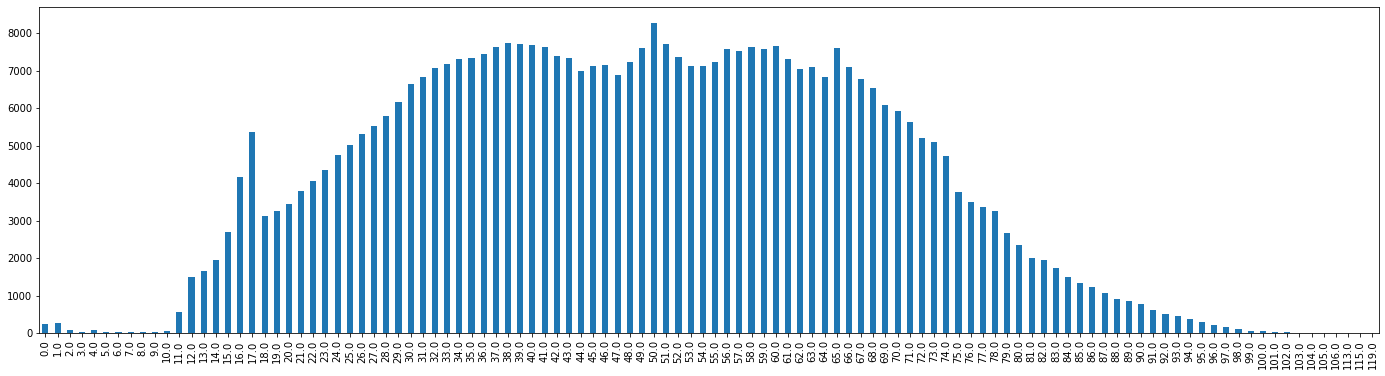

In [13]:
import matplotlib.pyplot as plt

# Age distribution
df["AGE_YRS"] = df["AGE_YRS"].round()
age_df=df[['AGE_YRS', 'SEX']]
age_bar_graph=age_df["AGE_YRS"].value_counts().sort_index().plot(kind='bar', figsize=(24, 6))

(array([7.7300e+02, 7.3100e+02, 1.7329e+04, 2.2030e+04, 3.2553e+04,
        4.2396e+04, 4.5827e+04, 4.2846e+04, 4.5322e+04, 4.4652e+04,
        4.3481e+04, 3.8028e+04, 2.5674e+04, 1.3942e+04, 6.8880e+03,
        3.0210e+03, 6.5200e+02, 4.9000e+01, 1.0000e+00, 7.0000e+00]),
 array([  0.  ,   5.95,  11.9 ,  17.85,  23.8 ,  29.75,  35.7 ,  41.65,
         47.6 ,  53.55,  59.5 ,  65.45,  71.4 ,  77.35,  83.3 ,  89.25,
         95.2 , 101.15, 107.1 , 113.05, 119.  ]),
 <a list of 20 Patch objects>)

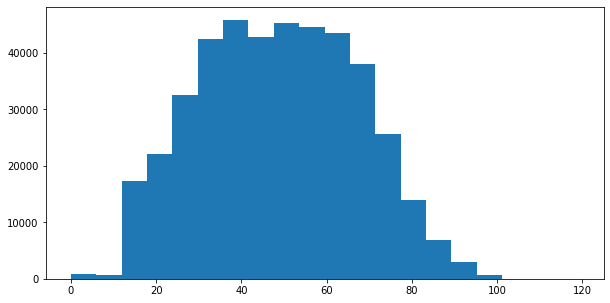

In [14]:
# Age distribution
age_dff=dict(age_df["AGE_YRS"].value_counts().sort_index())

mylist = [key for key, val in age_dff.items() for _ in range(val)]
plt.figure(figsize=(10,5))
plt.hist(mylist, bins=20 )

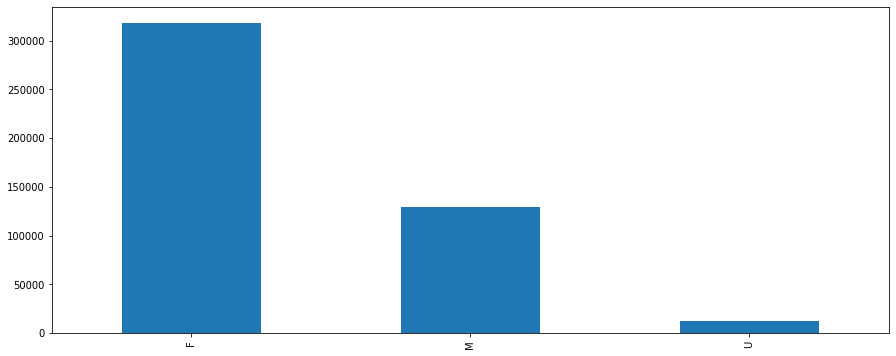

In [15]:
# Gender distribution
gender_bar_graph = age_df["SEX"].value_counts().sort_index().plot(kind='bar', figsize=(15, 6))

In [17]:
age_df["SEX"].value_counts()

F    318521
M    129777
U     12566
Name: SEX, dtype: int64

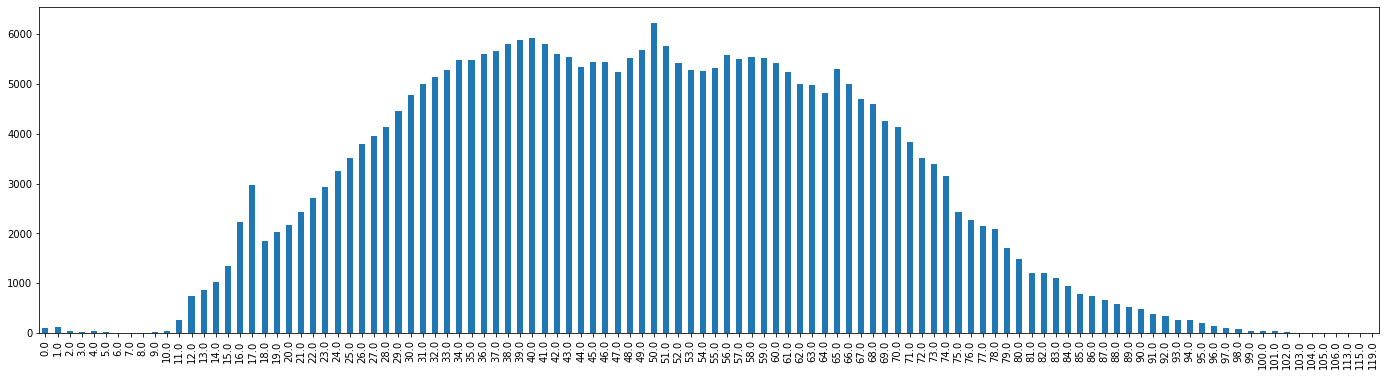

In [18]:
# Female age wise symptom cases
female_age_df=age_df[age_df["SEX"]=="F"]
female_age_bar_graph=female_age_df["AGE_YRS"].value_counts().sort_index().plot(kind='bar', figsize=(24, 6))

In [19]:
# Frequent symptoms observed post vaccination
sym1= dict(sym_df["SYMPTOM1"].value_counts())
sym2= dict(sym_df["SYMPTOM2"].value_counts())
sym3= dict(sym_df["SYMPTOM3"].value_counts())
sym4= dict(sym_df["SYMPTOM4"].value_counts())
sym5= dict(sym_df["SYMPTOM5"].value_counts())

sym_all = dict(Counter(sym1)+Counter(sym2)+Counter(sym3)+Counter(sym4)+Counter(sym5))
sym_all=dict(sorted(sym_all.items(), key=lambda item: item[1], reverse=True))

# display 20 frequent symptoms
out = dict(itertools.islice(sym_all.items(), 20)) 

for key, value in out.items():
  print(key, value)

Headache 87433
Pyrexia 72179
Fatigue 70930
Chills 65400
Pain 64433
Dizziness 52267
Nausea 50973
Pain in extremity 43764
Injection site pain 31703
Arthralgia 27890
Myalgia 27240
Rash 25136
Dyspnoea 24902
Injection site erythema 23690
Pruritus 23330
Vomiting 19637
Injection site swelling 19183
Asthenia 18312
Injection site pruritus 16980
Hyperhidrosis 16622


In [20]:
# Random sample of symptoms
sym_df["SYMPTOM1"].value_counts().sample(5)

Oral dysaesthesia                       1
Escherichia urinary tract infection     2
Pulmonary function test                32
Mycobacterium test negative             5
Blood testosterone                      3
Name: SYMPTOM1, dtype: int64

In [21]:
# Death count
df["DIED"].value_counts()

Y    6194
Name: DIED, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


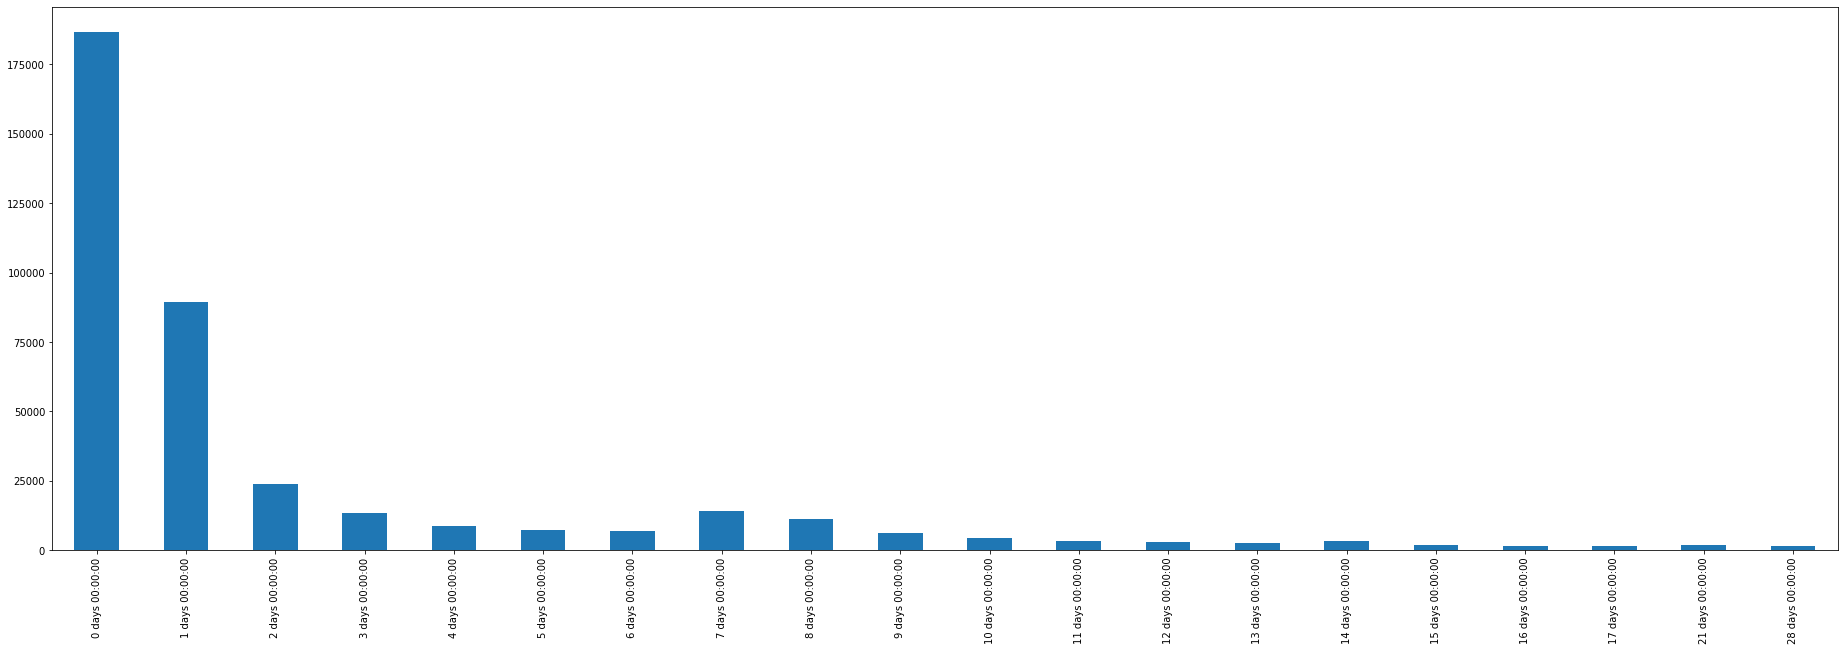

In [22]:
df['VAX_DATE'] = pd.to_datetime(df['VAX_DATE'], format='%m/%d/%Y')
df['ONSET_DATE'] = pd.to_datetime(df['ONSET_DATE'], format='%m/%d/%Y')
print((df["ONSET_DATE"]- df["VAX_DATE"]).value_counts()[0:20].sort_index().plot(kind='bar', figsize=(32, 10)))
# print(df["ONSET_DATE"]- df["VAX_DATE"].value_counts()[0:20].sort_index())

In [24]:
# Number of cases recorded for symptoms post 7 days of vaccination
subset_days_df=df[df["NUMDAYS"]>7]
print(subset_days_df["VAERS_ID"].count())

70994


In [25]:
# Frequent symptoms immediately after vaccination
zero_days_symptoms=df[df["NUMDAYS"]==0]
zero_days_symptoms["VAERS_ID"]

zero_sym= sym_df.merge(zero_days_symptoms, on="VAERS_ID", how="inner")
# print(zero_sym.columns)
# print(zero_sym.shape)

sym1= dict(zero_sym["SYMPTOM1"].value_counts())
sym2= dict(zero_sym["SYMPTOM2"].value_counts())
sym3= dict(zero_sym["SYMPTOM3"].value_counts())
sym4= dict(zero_sym["SYMPTOM4"].value_counts())
sym5= dict(zero_sym["SYMPTOM5"].value_counts())

sym_all = dict(Counter(sym1)+Counter(sym2)+Counter(sym3)+Counter(sym4)+Counter(sym5))
sym_all=dict(sorted(sym_all.items(), key=lambda item: item[1], reverse=True))

out = dict(itertools.islice(sym_all.items(), 20)) 

for key, value in out.items():
  print(key, value)

Headache 36388
Dizziness 33870
Chills 27797
Fatigue 27433
Pyrexia 27425
Nausea 24943
Pain 24212
Pain in extremity 16406
Injection site pain 11985
Dyspnoea 11786
Hyperhidrosis 11088
Myalgia 10927
Arthralgia 10516
Paraesthesia 9327
Pruritus 9058
Syncope 8916
Vomiting 8830
Hypoaesthesia 7782
Asthenia 7585
Rash 6984


In [26]:
# Frequent Symptoms after 6 day of Vaccination
zero_days_symptoms=df[df["NUMDAYS"]==6 ]
zero_days_symptoms["VAERS_ID"]

zero_sym= sym_df.merge(zero_days_symptoms, on="VAERS_ID", how="inner")

sym1= dict(zero_sym["SYMPTOM1"].value_counts())
sym2= dict(zero_sym["SYMPTOM2"].value_counts())
sym3= dict(zero_sym["SYMPTOM3"].value_counts())
sym4= dict(zero_sym["SYMPTOM4"].value_counts())
sym5= dict(zero_sym["SYMPTOM5"].value_counts())

sym_all = dict(Counter(sym1)+Counter(sym2)+Counter(sym3)+Counter(sym4)+Counter(sym5))
sym_all=dict(sorted(sym_all.items(), key=lambda item: item[1], reverse=True))

out = dict(itertools.islice(sym_all.items(), 20)) 

for key, value in out.items():
  print(key, value)


Injection site erythema 988
Injection site pruritus 937
Headache 749
Injection site swelling 720
Fatigue 681
Rash 680
Pruritus 662
Pain 610
Injection site pain 582
Pain in extremity 582
Lymphadenopathy 522
Injection site warmth 475
Pyrexia 470
Erythema 453
Injection site rash 421
Urticaria 398
Chills 394
Nausea 370
Dizziness 361
Arthralgia 303


In [27]:
# Frequent Symptoms after 45 days
zero_days_symptoms=df[df["NUMDAYS"]>45]
zero_days_symptoms["VAERS_ID"]

zero_sym= sym_df.merge(zero_days_symptoms, on="VAERS_ID", how="inner")

sym1= dict(zero_sym["SYMPTOM1"].value_counts())
sym2= dict(zero_sym["SYMPTOM2"].value_counts())
sym3= dict(zero_sym["SYMPTOM3"].value_counts())
sym4= dict(zero_sym["SYMPTOM4"].value_counts())
sym5= dict(zero_sym["SYMPTOM5"].value_counts())

sym_all = dict(Counter(sym1)+Counter(sym2)+Counter(sym3)+Counter(sym4)+Counter(sym5))
sym_all=dict(sorted(sym_all.items(), key=lambda item: item[1], reverse=True))

out = dict(itertools.islice(sym_all.items(), 20)) 

for key, value in out.items():
  print(key, value)


COVID-19 4041
SARS-CoV-2 test positive 3596
Fatigue 1101
Cough 1100
Headache 1085
Pyrexia 1001
Dyspnoea 988
Pain 741
Death 578
Chills 574
SARS-CoV-2 test 548
Blood test 493
Nausea 475
Oropharyngeal pain 470
Dizziness 443
Pain in extremity 443
Rhinorrhoea 425
Chest pain 410
Myalgia 379
Asthenia 371


In [28]:
# Died or Hospitalised or Life threatening illness or Emergency room visit or Prolonged hospitalisation
severe_df=df[(df["DIED"]=="Y") | (df["HOSPITAL"]=="Y") | (df["L_THREAT"]=="Y") | (df["ER_VISIT"]=="Y") | (df["X_STAY"]=="Y")]
severe_df["VAERS_ID"].count()

34758

In [29]:
# severe case symptoms
zero_sym= sym_df.merge(severe_df, on="VAERS_ID", how="inner")

sym1= dict(zero_sym["SYMPTOM1"].value_counts())
sym2= dict(zero_sym["SYMPTOM2"].value_counts())
sym3= dict(zero_sym["SYMPTOM3"].value_counts())
sym4= dict(zero_sym["SYMPTOM4"].value_counts())
sym5= dict(zero_sym["SYMPTOM5"].value_counts())

sym_all = dict(Counter(sym1)+Counter(sym2)+Counter(sym3)+Counter(sym4)+Counter(sym5))
sym_all=dict(sorted(sym_all.items(), key=lambda item: item[1], reverse=True))

out = dict(itertools.islice(sym_all.items(), 20)) 

for key, value in out.items():
  print(key, value)

Dyspnoea 5130
Death 5005
Pyrexia 3556
Chest pain 3201
Headache 2979
COVID-19 2875
Fatigue 2769
Blood test 2421
SARS-CoV-2 test positive 2349
Nausea 2342
Asthenia 2289
Dizziness 2179
Pain 2158
Computerised tomogram 2088
Vomiting 2016
Pulmonary embolism 1913
Chills 1868
Cerebrovascular accident 1774
Electrocardiogram 1630
Pain in extremity 1620
